In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
surface = pd.read_csv('Guajillo_SurfaceData.csv')
surface.head()

,Well Name,Depth (ft),Rig State,ROP (ft/hr),WOB (klb),Diff Press (psi),Torque (ft-lb),RPM (rpm),Flow In (gpm),ECD
0,GUAJILLO UNIT 8 SOUTH 5H,14.9,SLIDE DRILLING,2054.0,107.6,NaN,NaN,0.1,290.3,18.2
1,GUAJILLO UNIT 8 SOUTH 5H,16.7,SLIDE DRILLING,1256.8,107.6,NaN,NaN,0.1,283.2,16.4
2,GUAJILLO UNIT 8 SOUTH 5H,18.3,SLIDE DRILLING,1018.8,107.5,NaN,NaN,0.1,98.3,19.9
3,GUAJILLO UNIT 8 SOUTH 5H,19.4,SLIDE DRILLING,736.1,107.5,NaN,NaN,0.1,93.8,18.5
4,GUAJILLO UNIT 8 SOUTH 5H,21.4,SLIDE DRILLING,2080.0,107.8,NaN,634.1,0.1,522.8,16.4


In [3]:
pump = pd.read_csv('Guajillo_PumpData.csv')
pump.head()

,Depth Index( ft ),MudFlowInAvg (gpm ),MudDensityInAvg (ppg ),ROPAvg (ft/hr ),RPMA (rpm ),WeightonBitMax (klb ),SurfaceTorqueMax (ft-lb ),PumpPressure (psi )
0,1.0,0.0,10,0.0,0.2,126.8,0.0,10.1
1,4.0,0.0,10,3432.7,0.1,108.6,0.0,8.9
2,9.0,0.0,10,3376.4,0.1,108.5,0.0,9.8
3,12.0,0.0,10,933.2,0.1,108.4,0.0,10.0
4,13.5,0.0,10,832.2,0.1,109.1,0.0,8.8


In [4]:
d_pump = pump['Depth Index( ft )'].apply(lambda x: np.ceil(x))
d_surface = surface['Depth (ft)'].apply(lambda x: np.ceil(x))
surface['Depth (ft)'] = d_surface
pump['Depth Index( ft )'] = d_pump

In [5]:
surface.drop(['Well Name', 'Rig State'], axis=1, inplace=True)
pump.drop(['MudFlowInAvg (gpm )', 'ROPAvg (ft/hr )', 'RPMA (rpm )', 'WeightonBitMax (klb )',
       'SurfaceTorqueMax (ft-lb )'], axis=1, inplace=True)

In [6]:
surface = surface.rename({'Depth (ft)': 'Depth', 'ROP (ft/hr)': 'ROP', 'WOB (klb)': 'WOB', 'Diff Press (psi)': 'DelP',
                'Torque (ft-lb)': 'Torque', 'RPM (rpm)': 'RPM', 'Flow In (gpm)': 'Flow Rate'}, axis=1)
surface.head()

,Depth,ROP,WOB,DelP,Torque,RPM,Flow Rate,ECD
0,15.0,2054.0,107.6,NaN,NaN,0.1,290.3,18.2
1,17.0,1256.8,107.6,NaN,NaN,0.1,283.2,16.4
2,19.0,1018.8,107.5,NaN,NaN,0.1,98.3,19.9
3,20.0,736.1,107.5,NaN,NaN,0.1,93.8,18.5
4,22.0,2080.0,107.8,NaN,634.1,0.1,522.8,16.4


In [7]:
pump = pump.rename({'Depth Index( ft )': 'Depth', 'PumpPressure (psi )': 'Pump Pressure', 
                    'MudDensityInAvg (ppg )': 'Mud Weight'}, axis=1)
pump.head()

,Depth,Mud Weight,Pump Pressure
0,1.0,10,10.1
1,4.0,10,8.9
2,9.0,10,9.8
3,12.0,10,10.0
4,14.0,10,8.8


In [8]:
data = pd.merge(surface, pump, how = 'outer')
data.head()

,Depth,ROP,WOB,DelP,Torque,RPM,Flow Rate,ECD,Mud Weight,Pump Pressure
0,15.0,2054.0,107.6,NaN,NaN,0.1,290.3,18.2,10.0,309.9
1,17.0,1256.8,107.6,NaN,NaN,0.1,283.2,16.4,10.0,205.2
2,19.0,1018.8,107.5,NaN,NaN,0.1,98.3,19.9,10.0,123.3
3,20.0,736.1,107.5,NaN,NaN,0.1,93.8,18.5,10.0,120.5
4,22.0,2080.0,107.8,NaN,634.1,0.1,522.8,16.4,10.0,590.7


In [9]:
data = data.dropna()
data = data.groupby('Depth').mean()
data = data.reset_index()
data.head()

,Depth,ROP,WOB,DelP,Torque,RPM,Flow Rate,ECD,Mud Weight,Pump Pressure
0,36.0,918.4,0.2,27.6,454.9,19.8,522.9,14.5,10.0,663.4
1,38.0,1585.2,0.1,28.5,362.7,19.8,522.9,15.6,10.0,648.6
2,40.0,1558.7,0.2,7.1,173.1,19.8,522.9,15.6,10.0,644.8
3,42.0,1307.0,0.3,17.4,310.3,19.8,522.9,15.2,10.0,620.6
4,44.0,1567.5,0.2,20.8,400.3,19.8,521.7,15.6,10.0,643.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Normalized_data = scaler.fit_transform(data)
Normdata = pd.DataFrame(Normalized_data, columns = data.columns)

In [11]:
Normdata.columns

Index(['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate', 'ECD',
       'Mud Weight', 'Pump Pressure'],
      dtype='object')

In [12]:
X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
y = Normdata['ECD']

In [13]:
X.head()

,Depth,ROP,WOB,DelP,Torque,RPM,Flow Rate,Mud Weight,Pump Pressure
0,0.000000,0.548329,0.003263,0.021053,0.016578,0.19469,0.027205,0.0,0.017703
1,0.000111,0.951777,0.001631,0.021763,0.012671,0.19469,0.027205,0.0,0.014732
2,0.000222,0.935743,0.003263,0.004889,0.004636,0.19469,0.027205,0.0,0.013969
3,0.000333,0.783452,0.004894,0.013011,0.010450,0.19469,0.027205,0.0,0.009112
4,0.000444,0.941068,0.003263,0.015692,0.014264,0.19469,0.025007,0.0,0.013608


In [14]:
y.head()

0    0.551724
1    0.931034
2    0.931034
3    0.793103
4    0.931034
Name: ECD, dtype: float64

# Decision Tree Regressor

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
DTreg = DecisionTreeRegressor(random_state=101)
DTreg.fit(X_train,y_train)
R2 = DTreg.score(X_test,y_test)
R2

0.9986357586583361

In [17]:
DTreg.score(X_train,y_train)

1.0

In [18]:
from sklearn.decomposition import PCA
pca5 = PCA(n_components=5)
pca5 = pca5.fit_transform(X)
X5 = pd.DataFrame(pca5, columns=['1', '2','3','4','5'])
X5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16298 entries, 0 to 16297
Data columns (total 5 columns):
1    16298 non-null float64
2    16298 non-null float64
3    16298 non-null float64
4    16298 non-null float64
5    16298 non-null float64
dtypes: float64(5)
memory usage: 636.7 KB


In [19]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, train_size=0.75, random_state=101)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
DTreg.fit(X5_train,y5_train)
R2_5 = DTreg.score(X5_test,y5_test)
R2_5

0.982871961497214

In [21]:
DTreg.score(X5_train,y5_train)

1.0

In [22]:
pca6 = PCA(n_components=6)
pca6 = pca6.fit_transform(X)
X6 = pd.DataFrame(pca6, columns=['1', '2','3','4','5','6'])
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, train_size=0.75, random_state=101)
DTreg.fit(X6_train,y6_train)
R2_6 = DTreg.score(X6_test,y6_test)
R2_6

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9816277549267286

In [23]:
DTreg.score(X6_train,y6_train)

1.0

In [24]:
pca4 = PCA(n_components=4)
pca4 = pca4.fit_transform(X)
X4 = pd.DataFrame(pca4, columns=['1', '2','3','4'])
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, train_size=0.75, random_state=101)
DTreg.fit(X4_train,y4_train)
R2_4 = DTreg.score(X4_test,y4_test)
R2_4

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9680038083979629

In [25]:
DTreg.score(X4_train,y4_train)

1.0

In [26]:
pca7 = PCA(n_components=7)
pca7 = pca7.fit_transform(X)
X7 = pd.DataFrame(pca7, columns=['1', '2','3','4','5','6','7'])
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, train_size=0.75, random_state=101)
DTreg.fit(X7_train,y7_train)
R2_7 = DTreg.score(X7_test,y7_test)
R2_7

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9833013166402758

In [27]:
DTreg.score(X7_train,y7_train)

1.0

In [28]:
pca3 = PCA(n_components=3)
pca3 = pca3.fit_transform(X)
X3 = pd.DataFrame(pca3, columns=['1', '2','3'])
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, train_size=0.75, random_state=101)
DTreg.fit(X3_train,y3_train)
R2_3 = DTreg.score(X3_test,y3_test)
R2_3

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9556563854934612

In [29]:
DTreg.score(X3_train,y3_train)

1.0

In [30]:
pca8 = PCA(n_components=8)
pca8 = pca8.fit_transform(X)
X8 = pd.DataFrame(pca8, columns=['1', '2','3','4','5','6','7','8'])
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, train_size=0.75, random_state=101)
DTreg.fit(X8_train,y8_train)
R2_8 = DTreg.score(X8_test,y8_test)
R2_8

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.983178973508113

In [31]:
pca_R2_y = [R2_3, R2_4, R2_5, R2_6, R2_7, R2_8, R2]
pca_R2_y

[0.9556563854934612,
 0.9680038083979629,
 0.982871961497214,
 0.9816277549267286,
 0.9833013166402758,
 0.983178973508113,
 0.9986357586583361]

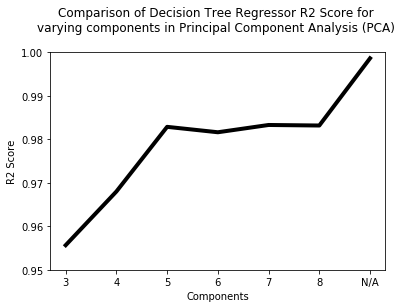

In [32]:
pca_R2_x = ['3', '4', '5', '6', '7', '8', 'N/A']
pca_R2_y = [R2_3, R2_4, R2_5, R2_6, R2_7, R2_8, R2]
plt.plot(pca_R2_x, pca_R2_y, color='k', linewidth=4)
plt.ylim([0.95, 1.0])
ax = plt.gca()
plt.title("Comparison of Decision Tree Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
fR2 = rfr.score(X_test,y_test)
fR2

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9991727526740912

In [34]:
comp = [3, 4, 5, 6, 7, 8]
R2_Scores = []

In [35]:
for c in comp:
    X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
    y = Normdata['ECD']
    pca = PCA(n_components = c)
    pca = pca.fit_transform(X)
    X = pd.DataFrame(pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)
    rfr.fit(X_train,y_train)
    R2 = rfr.score(X_test,y_test)
    R2_Scores.append(R2)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, tes

In [36]:
comp.append('N/A')
R2_Scores.append(fR2)

In [37]:
R2_Scores

[0.9710878017564678,
 0.9791562159045524,
 0.9896822265744687,
 0.9894379096479006,
 0.9917712701815625,
 0.9914678822974087,
 0.9991727526740912]

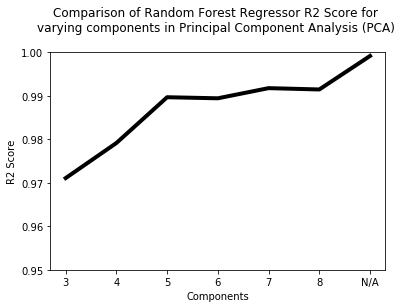

In [38]:
plt.plot(comp, R2_Scores, color='k', linewidth=4)
plt.ylim([0.95, 1.0])
ax = plt.gca()
plt.title("Comparison of Random Forest Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# Elastic Net Regression

In [39]:
from sklearn.linear_model import ElasticNet
ereg = ElasticNet(alpha=0.01)
ereg.fit(X_train, y_train)
eR2 = ereg.score(X_test,y_test)
eR2

0.8452197441509554

In [40]:
ecomp = [3, 4, 5, 6, 7, 8]
eR2_Scores = []

In [41]:
for e in ecomp:
    X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
    y = Normdata['ECD']
    pca = PCA(n_components = e)
    pca = pca.fit_transform(X)
    X = pd.DataFrame(pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)
    ereg.fit(X_train,y_train)
    eR2 = ereg.score(X_test,y_test)
    eR2_Scores.append(eR2)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, tes

In [42]:
ecomp.append('N/A')
eR2_Scores.append(eR2)

In [43]:
eR2_Scores

[0.8266992115477011,
 0.8452197441509556,
 0.8452197441509554,
 0.8452197441509557,
 0.8452197441509557,
 0.8452197441509554,
 0.8452197441509554]

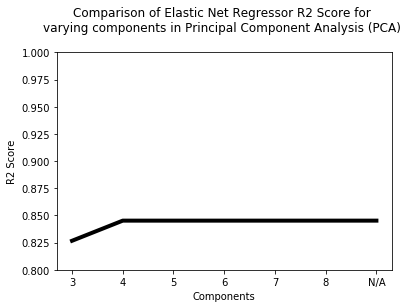

In [44]:
plt.plot(ecomp, eR2_Scores, color='k', linewidth=4)
plt.ylim([0.80, 1.0])
ax = plt.gca()
plt.title("Comparison of Elastic Net Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# XGBoost Regressor

In [45]:
import xgboost as xgb
xgreg = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgreg.fit(X_train,y_train)
xgR2 = xgreg.score(X_test,y_test)
xgR2

[00:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7402326529503168

In [46]:
import xgboost as xgb
xgreg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgreg.fit(X_train,y_train)
xgR2 = xgreg.score(X_test,y_test)
xgR2

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7402326529503168

In [47]:
import xgboost as xgb
xgreg = xgb.XGBRegressor(verbosity=0)
xgreg.fit(X_train,y_train)
xgR2 = xgreg.score(X_test,y_test)
xgR2

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9868601338415264

In [48]:
xcomp = [3, 4, 5, 6, 7, 8]
xR2_Scores = []

In [49]:
for x in xcomp:
    X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
    y = Normdata['ECD']
    pca = PCA(n_components = x)
    pca = pca.fit_transform(X)
    X = pd.DataFrame(pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)
    xgreg.fit(X_train,y_train)
    xR2 = xgreg.score(X_test,y_test)
    xR2_Scores.append(xR2)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always

In [50]:
xcomp.append('N/A')
xR2_Scores.append(xgR2)
xR2_Scores

[0.9579440232679746,
 0.964109076707281,
 0.9780278042740392,
 0.982650714340146,
 0.9873208166559269,
 0.9868601338415264,
 0.9868601338415264]

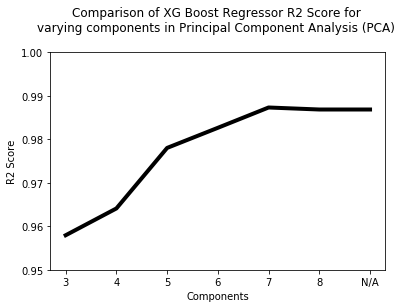

In [51]:
plt.plot(xcomp, xR2_Scores, color='k', linewidth=4)
plt.ylim([0.95, 1.0])
ax = plt.gca()
plt.title("Comparison of XG Boost Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# Support Vector Machine Regressor

In [52]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svmR2 = svr.score(X_test,y_test)
svmR2

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9325000448071359

In [53]:
svcomp = [3, 4, 5, 6, 7, 8]
svmR2_Scores = []

In [54]:
for sv in svcomp:
    X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
    y = Normdata['ECD']
    pca = PCA(n_components = sv)
    pca = pca.fit_transform(X)
    X = pd.DataFrame(pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)
    svr.fit(X_train,y_train)
    svR2 = svr.score(X_test,y_test)
    svmR2_Scores.append(svR2)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or

In [55]:
svcomp.append('N/A')
svmR2_Scores.append(svmR2)
svmR2_Scores

[0.9311305131507295,
 0.947032754333884,
 0.9573991347042978,
 0.9650266374952505,
 0.9283673583118662,
 0.9325000448071359,
 0.9325000448071359]

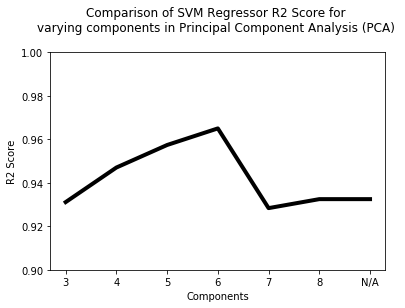

In [56]:
plt.plot(svcomp, svmR2_Scores, color='k', linewidth=4)
plt.ylim([0.90, 1.0])
ax = plt.gca()
plt.title("Comparison of SVM Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn = [1,2,3,4,5,6,7,8,9,10,11,12]
R2score_knn = []

In [59]:
for k in knn:
    model = KNeighborsRegressor(k).fit(X_train,y_train)   
    score = model.score(X_test,y_test)
    R2score_knn.append(score)
R2score_knn

[0.9896654678737233,
 0.992231788197911,
 0.9923918986806208,
 0.9925129754202993,
 0.9925518424483707,
 0.9923721493699782,
 0.9920985745698889,
 0.991717240107276,
 0.9915946021959906,
 0.9914537320445755,
 0.9913207725503954,
 0.99123872809645]

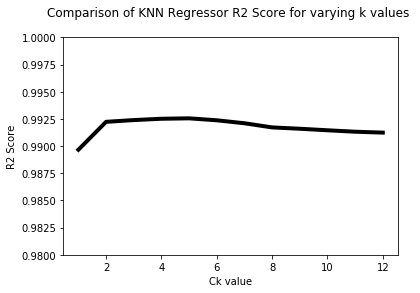

In [60]:
plt.plot(knn, R2score_knn, color='k', linewidth=4)
plt.ylim([0.98, 1.0])
ax = plt.gca()
plt.title("Comparison of KNN Regressor R2 Score for varying k values \n")
plt.xlabel("Ck value")
plt.ylabel("R2 Score")
plt.show()

In [61]:
clf = KNeighborsRegressor(5)
clf.fit(X_train,y_train)
clfR2 = clf.score(X_test,y_test)
clfR2

0.9925518424483707

In [62]:
knncomp = [3, 4, 5, 6, 7, 8]
knnR2_Scores = []

In [63]:
for k in knncomp:
    X = Normdata[['Depth', 'ROP', 'WOB', 'DelP', 'Torque', 'RPM', 'Flow Rate',
       'Mud Weight', 'Pump Pressure']]
    y = Normdata['ECD']
    pca = PCA(n_components = k)
    pca = pca.fit_transform(X)
    X = pd.DataFrame(pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)
    clf.fit(X_train,y_train)
    knnR2 = clf.score(X_test,y_test)
    knnR2_Scores.append(knnR2)

C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\INSOMNIAC_PRATHAM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, tes

In [64]:
knncomp.append('N/A')
knnR2_Scores.append(clfR2)
knnR2_Scores

[0.972400866735112,
 0.979846438922439,
 0.9881290228026378,
 0.9882277283183224,
 0.9925368842691931,
 0.9925518424483707,
 0.9925518424483707]

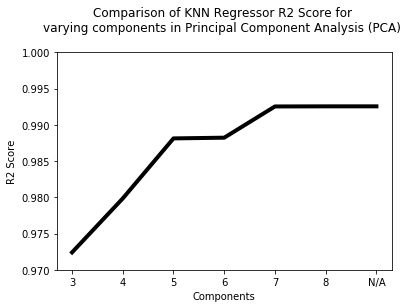

In [65]:
plt.plot(knncomp, knnR2_Scores, color='k', linewidth=4)
plt.ylim([0.97, 1.0])
ax = plt.gca()
plt.title("Comparison of KNN Regressor R2 Score for \nvarying components in Principal Component Analysis (PCA) \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()

# Comparison of various Machine Learning Models

In [66]:
Plot_R2 = [R2, fR2, eR2, xR2, svmR2, clfR2]
Plot_x = ['Decision Tree', 'Random Forest', 'Elastic Net', 'XGBoost', 'SVM', 'KNN']

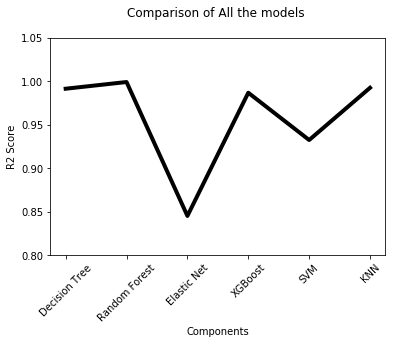

In [67]:
plt.plot(Plot_x, Plot_R2, color='k', linewidth=4)
plt.ylim([0.8, 1.05])
ax = plt.gca()
plt.title("Comparison of All the models \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

# Comparing varying PCA components for different models

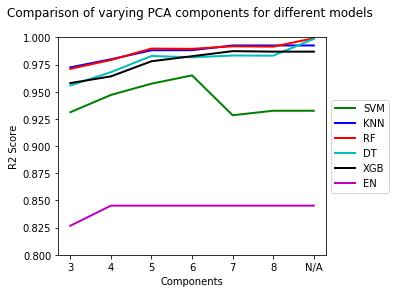

In [68]:
plt.plot(svcomp, svmR2_Scores, color='g', linewidth=2, label = 'SVM')
plt.plot(knncomp, knnR2_Scores, color='b', linewidth=2, label = 'KNN')
plt.plot(comp, R2_Scores, color='r', linewidth=2, label = 'RF')
plt.plot(pca_R2_x, pca_R2_y, color='c', linewidth=2, label = 'DT')
plt.plot(xcomp, xR2_Scores, color='k', linewidth=2, label = 'XGB')
plt.plot(ecomp, eR2_Scores, color='m', linewidth=2, label = 'EN')
plt.ylim([0.80, 1.0])
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Comparison of varying PCA components for different models \n")
plt.xlabel("Components")
plt.ylabel("R2 Score")
plt.show()